## Clasificación de datos estructurados por medio de una red neuronal profunda 

El presente trabajo muestra uso de redes neuronales para predecir la eficiencia en el proceso de corte de piezas bases de diezmillo choice, dentro de una carnicería con enfoque a comida rápida.

Por cuestiones legales no se incluyen información del origen de la información.

Presenta: Carlos Alberto Rábago Figueroa

#### Descripción de variables del Dataset:

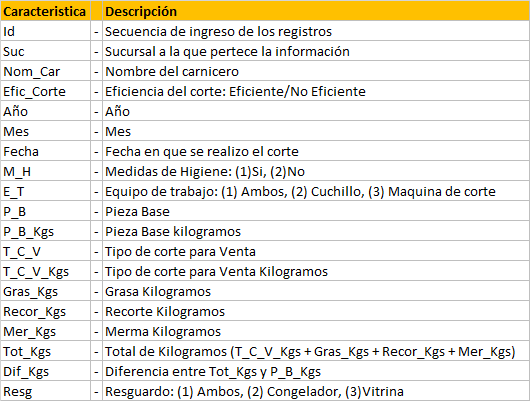

##### 1.	Selección de la muestra 

In [ ]:
import pandas as pd

In [49]:
df = pd.read_csv("Base_Carniceria.csv",sep=",",encoding = 'latin-1')
df.head()

,Id,Suc,Nom_Car,Efic_Corte,Año,Mes,Fecha,M_H,E_T,P_B,P_B_Kgs,T_C_V,T_C_V_Kgs,Gras_Kgs,Recor_Kgs,Mer_Kgs,Tot_Kgs,Dif_Kgs,Resg
0,1,1,ALEX,E,2020,10,03/10/2020,1,1,1,23.70,13,22.831,0.0,0.652,0.202,23.685,0.015,1
1,2,1,ALEX,E,2020,10,03/10/2020,1,1,1,6.40,13,6.140,0.0,0.190,0.046,6.376,0.024,1
2,3,1,ALEX,E,2020,10,04/10/2020,1,1,1,6.40,13,6.120,0.0,0.111,0.080,6.311,0.089,1
3,4,1,ALEX,E,2020,10,04/10/2020,1,1,1,6.98,13,6.800,0.0,0.041,0.116,6.957,0.023,1
4,5,1,ALEX,E,2020,10,04/10/2020,1,1,1,5.52,13,5.170,0.0,0.100,0.220,5.490,0.030,1


#### 2.	Preprocesamiento de datos 

In [50]:
df = df.drop(['Id'], axis=1)

In [51]:
df

,Suc,Nom_Car,Efic_Corte,Año,Mes,Fecha,M_H,E_T,P_B,P_B_Kgs,T_C_V,T_C_V_Kgs,Gras_Kgs,Recor_Kgs,Mer_Kgs,Tot_Kgs,Dif_Kgs,Resg
0,1,ALEX,E,2020,10,03/10/2020,1,1,1,23.700,13,22.831,0.000,0.652,0.202,23.685,0.015,1
1,1,ALEX,E,2020,10,03/10/2020,1,1,1,6.400,13,6.140,0.000,0.190,0.046,6.376,0.024,1
2,1,ALEX,E,2020,10,04/10/2020,1,1,1,6.400,13,6.120,0.000,0.111,0.080,6.311,0.089,1
3,1,ALEX,E,2020,10,04/10/2020,1,1,1,6.980,13,6.800,0.000,0.041,0.116,6.957,0.023,1
4,1,ALEX,E,2020,10,04/10/2020,1,1,1,5.520,13,5.170,0.000,0.100,0.220,5.490,0.030,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
843,1,PEDRO,NE,2021,1,30/01/2021,1,3,1,10.453,13,9.600,0.000,0.490,0.345,10.435,0.018,3
844,1,PEDRO,E,2021,1,31/01/2021,1,3,1,14.540,13,14.200,0.090,0.125,0.100,14.515,0.025,3
845,1,PEDRO,E,2021,1,31/01/2021,1,3,1,10.730,13,10.000,0.200,0.050,0.460,10.710,0.020,3
846,1,PEDRO,E,2021,1,31/01/2021,1,3,1,8.845,13,8.300,0.245,0.000,0.210,8.755,0.090,3


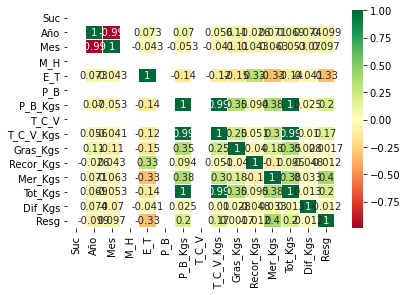

In [52]:
import seaborn as sns
fig = sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)

In [53]:
cols = ['Suc',
        'Nom_Car',
        'Año',
        'Mes',
        'Fecha',
       'M_H',
        'E_T',
        'T_C_V',
        'Tot_Kgs'] 

df = df.drop(cols,axis=1)

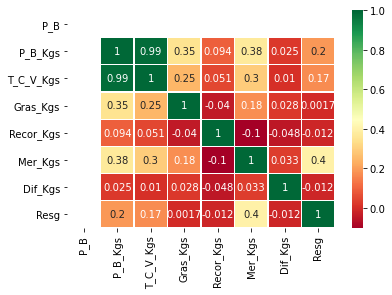

In [54]:
fig = sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)

In [55]:
df

,Efic_Corte,P_B,P_B_Kgs,T_C_V_Kgs,Gras_Kgs,Recor_Kgs,Mer_Kgs,Dif_Kgs,Resg
0,E,1,23.700,22.831,0.000,0.652,0.202,0.015,1
1,E,1,6.400,6.140,0.000,0.190,0.046,0.024,1
2,E,1,6.400,6.120,0.000,0.111,0.080,0.089,1
3,E,1,6.980,6.800,0.000,0.041,0.116,0.023,1
4,E,1,5.520,5.170,0.000,0.100,0.220,0.030,1
...,...,...,...,...,...,...,...,...,...
843,NE,1,10.453,9.600,0.000,0.490,0.345,0.018,3
844,E,1,14.540,14.200,0.090,0.125,0.100,0.025,3
845,E,1,10.730,10.000,0.200,0.050,0.460,0.020,3
846,E,1,8.845,8.300,0.245,0.000,0.210,0.090,3


In [56]:
import numpy as np
from sklearn.model_selection import train_test_split

X_df = df
X_df = X_df.drop(['Efic_Corte'], axis=1)
y_df = df['Efic_Corte']
y_df = [0 if x == 'E' else 1 for x in y_df]

In [57]:
x_tr, x_ts, y_tr, y_ts = train_test_split(X_df, y_df, test_size = 0.3, random_state = 42)

y_tr = np.asarray(y_tr, dtype = np.int)
y_ts = np.asarray(y_ts, dtype = np.int)

y_tr = np.reshape(y_tr, [593,1])
y_ts = np.reshape(y_ts, [255,1])

print(x_ts.shape)
print(x_tr.shape)
print(y_ts.shape)
print(y_tr.shape)

(255, 8)
(593, 8)
(255, 1)
(593, 1)


In [58]:
from sklearn.preprocessing import MinMaxScaler, Normalizer
# Training Data
x_tr = MinMaxScaler().fit_transform(x_tr)
print("Training Data :", x_tr.shape)

# Testing Data
x_ts = MinMaxScaler().fit_transform(x_ts)
print("Testing Data :", x_ts.shape)

Training Data : (593, 8)
Testing Data : (255, 8)


#### 3 y 4.	Definición de la red neuronal e hiperparametros y Entrenamiento de la red neuronal 

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_38 (Dense)             (None, 8)                 72        
_________________________________________________________________
dense_39 (Dense)             (None, 1)                 9         
Total params: 81
Trainable params: 81
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2000
19/19 [==============================] - 2s 31ms/step - loss: 0.6725 - accuracy: 0.6511 - val_loss: 0.6702 - val_accuracy: 0.6588
Epoch 2/2000
19/19 [==============================] - 0s 8ms/step - loss: 0.6731 - accuracy: 0.6330 - val_loss: 0.6676 - val_accuracy: 0.6588
Epoch 3/2000
19/19 [==============================] - 0s 9ms/step - loss: 0.6722 - accuracy: 0.6272 - val_loss: 0.6655 - val_accuracy: 0.6588
Epoch 4/2000
19/19 [==============================] - 0s 9ms/step - loss: 0.6684 - accuracy:

Epoch 54/2000
19/19 [==============================] - 0s 10ms/step - loss: 0.6636 - accuracy: 0.6194 - val_loss: 0.6426 - val_accuracy: 0.6588
Epoch 55/2000
19/19 [==============================] - 0s 8ms/step - loss: 0.6560 - accuracy: 0.6332 - val_loss: 0.6425 - val_accuracy: 0.6588
Epoch 56/2000
19/19 [==============================] - 0s 9ms/step - loss: 0.6406 - accuracy: 0.6606 - val_loss: 0.6425 - val_accuracy: 0.6588
Epoch 57/2000
19/19 [==============================] - 0s 10ms/step - loss: 0.6487 - accuracy: 0.6459 - val_loss: 0.6424 - val_accuracy: 0.6588
Epoch 58/2000
19/19 [==============================] - 0s 10ms/step - loss: 0.6423 - accuracy: 0.6580 - val_loss: 0.6424 - val_accuracy: 0.6588
Epoch 59/2000
19/19 [==============================] - 0s 10ms/step - loss: 0.6462 - accuracy: 0.6501 - val_loss: 0.6423 - val_accuracy: 0.6588
Epoch 60/2000
19/19 [==============================] - ETA: 0s - loss: 0.6397 - accuracy: 0.66 - 0s 9ms/step - loss: 0.6419 - accuracy: 0.

19/19 [==============================] - 0s 10ms/step - loss: 0.6476 - accuracy: 0.6471 - val_loss: 0.6412 - val_accuracy: 0.6588
Epoch 111/2000
19/19 [==============================] - 0s 9ms/step - loss: 0.6486 - accuracy: 0.6443 - val_loss: 0.6412 - val_accuracy: 0.6588
Epoch 112/2000
19/19 [==============================] - 0s 10ms/step - loss: 0.6283 - accuracy: 0.6787 - val_loss: 0.6412 - val_accuracy: 0.6588
Epoch 113/2000
19/19 [==============================] - 0s 10ms/step - loss: 0.6574 - accuracy: 0.6281 - val_loss: 0.6412 - val_accuracy: 0.6588
Epoch 114/2000
19/19 [==============================] - 0s 10ms/step - loss: 0.6573 - accuracy: 0.6293 - val_loss: 0.6411 - val_accuracy: 0.6588
Epoch 115/2000
19/19 [==============================] - 0s 11ms/step - loss: 0.6365 - accuracy: 0.6655 - val_loss: 0.6411 - val_accuracy: 0.6588
Epoch 116/2000
19/19 [==============================] - 0s 10ms/step - loss: 0.6467 - accuracy: 0.6478 - val_loss: 0.6411 - val_accuracy: 0.6588
E

Epoch 167/2000
19/19 [==============================] - 0s 10ms/step - loss: 0.6469 - accuracy: 0.6460 - val_loss: 0.6402 - val_accuracy: 0.6588
Epoch 168/2000
19/19 [==============================] - 0s 15ms/step - loss: 0.6630 - accuracy: 0.6186 - val_loss: 0.6402 - val_accuracy: 0.6588
Epoch 169/2000
19/19 [==============================] - 0s 9ms/step - loss: 0.6571 - accuracy: 0.6299 - val_loss: 0.6402 - val_accuracy: 0.6588
Epoch 170/2000
19/19 [==============================] - 0s 10ms/step - loss: 0.6590 - accuracy: 0.6254 - val_loss: 0.6402 - val_accuracy: 0.6588
Epoch 171/2000
19/19 [==============================] - 0s 11ms/step - loss: 0.6457 - accuracy: 0.6474 - val_loss: 0.6401 - val_accuracy: 0.6588
Epoch 172/2000
19/19 [==============================] - 0s 9ms/step - loss: 0.6438 - accuracy: 0.6510 - val_loss: 0.6401 - val_accuracy: 0.6588
Epoch 173/2000
19/19 [==============================] - 0s 10ms/step - loss: 0.6613 - accuracy: 0.6227 - val_loss: 0.6401 - val_accu

Epoch 223/2000
19/19 [==============================] - 0s 9ms/step - loss: 0.6576 - accuracy: 0.6239 - val_loss: 0.6391 - val_accuracy: 0.6588
Epoch 224/2000
19/19 [==============================] - 0s 9ms/step - loss: 0.6371 - accuracy: 0.6608 - val_loss: 0.6391 - val_accuracy: 0.6588
Epoch 225/2000
19/19 [==============================] - 0s 9ms/step - loss: 0.6365 - accuracy: 0.6621 - val_loss: 0.6391 - val_accuracy: 0.6588
Epoch 226/2000
19/19 [==============================] - 0s 9ms/step - loss: 0.6416 - accuracy: 0.6535 - val_loss: 0.6391 - val_accuracy: 0.6588
Epoch 227/2000
19/19 [==============================] - 0s 9ms/step - loss: 0.6641 - accuracy: 0.6143 - val_loss: 0.6391 - val_accuracy: 0.6588
Epoch 228/2000
19/19 [==============================] - 0s 9ms/step - loss: 0.6475 - accuracy: 0.6442 - val_loss: 0.6391 - val_accuracy: 0.6588
Epoch 229/2000
19/19 [==============================] - 0s 9ms/step - loss: 0.6556 - accuracy: 0.6304 - val_loss: 0.6390 - val_accuracy:

Epoch 280/2000
19/19 [==============================] - 0s 9ms/step - loss: 0.6484 - accuracy: 0.6425 - val_loss: 0.6379 - val_accuracy: 0.6588
Epoch 281/2000
19/19 [==============================] - 0s 9ms/step - loss: 0.6493 - accuracy: 0.6381 - val_loss: 0.6379 - val_accuracy: 0.6588
Epoch 282/2000
19/19 [==============================] - 0s 9ms/step - loss: 0.6457 - accuracy: 0.6445 - val_loss: 0.6379 - val_accuracy: 0.6588
Epoch 283/2000
19/19 [==============================] - 0s 8ms/step - loss: 0.6504 - accuracy: 0.6349 - val_loss: 0.6379 - val_accuracy: 0.6588
Epoch 284/2000
19/19 [==============================] - 0s 10ms/step - loss: 0.6396 - accuracy: 0.6515 - val_loss: 0.6379 - val_accuracy: 0.6588
Epoch 285/2000
19/19 [==============================] - 0s 9ms/step - loss: 0.6535 - accuracy: 0.6277 - val_loss: 0.6378 - val_accuracy: 0.6588
Epoch 286/2000
19/19 [==============================] - 0s 9ms/step - loss: 0.6381 - accuracy: 0.6536 - val_loss: 0.6378 - val_accuracy

Epoch 337/2000
19/19 [==============================] - 0s 9ms/step - loss: 0.6473 - accuracy: 0.6447 - val_loss: 0.6367 - val_accuracy: 0.6588
Epoch 338/2000
19/19 [==============================] - 0s 9ms/step - loss: 0.6397 - accuracy: 0.6489 - val_loss: 0.6366 - val_accuracy: 0.6588
Epoch 339/2000
19/19 [==============================] - 0s 8ms/step - loss: 0.6596 - accuracy: 0.6198 - val_loss: 0.6366 - val_accuracy: 0.6588
Epoch 340/2000
19/19 [==============================] - 0s 9ms/step - loss: 0.6492 - accuracy: 0.6342 - val_loss: 0.6366 - val_accuracy: 0.6588
Epoch 341/2000
19/19 [==============================] - 0s 9ms/step - loss: 0.6382 - accuracy: 0.6537 - val_loss: 0.6366 - val_accuracy: 0.6588
Epoch 342/2000
19/19 [==============================] - 0s 9ms/step - loss: 0.6433 - accuracy: 0.6441 - val_loss: 0.6366 - val_accuracy: 0.6588
Epoch 343/2000
19/19 [==============================] - 0s 10ms/step - loss: 0.6454 - accuracy: 0.6386 - val_loss: 0.6365 - val_accuracy

Epoch 394/2000
19/19 [==============================] - 0s 10ms/step - loss: 0.6452 - accuracy: 0.6347 - val_loss: 0.6353 - val_accuracy: 0.6588
Epoch 395/2000
19/19 [==============================] - 0s 9ms/step - loss: 0.6561 - accuracy: 0.6194 - val_loss: 0.6352 - val_accuracy: 0.6588
Epoch 396/2000
19/19 [==============================] - 0s 10ms/step - loss: 0.6430 - accuracy: 0.6492 - val_loss: 0.6352 - val_accuracy: 0.6588
Epoch 397/2000
19/19 [==============================] - 0s 10ms/step - loss: 0.6256 - accuracy: 0.6729 - val_loss: 0.6352 - val_accuracy: 0.6588
Epoch 398/2000
19/19 [==============================] - 0s 9ms/step - loss: 0.6302 - accuracy: 0.6653 - val_loss: 0.6352 - val_accuracy: 0.6588
Epoch 399/2000
19/19 [==============================] - 0s 10ms/step - loss: 0.6442 - accuracy: 0.6441 - val_loss: 0.6352 - val_accuracy: 0.6588
Epoch 400/2000
19/19 [==============================] - 0s 14ms/step - loss: 0.6368 - accuracy: 0.6546 - val_loss: 0.6352 - val_accu

Epoch 451/2000
19/19 [==============================] - 0s 11ms/step - loss: 0.6375 - accuracy: 0.6504 - val_loss: 0.6337 - val_accuracy: 0.6588
Epoch 452/2000
19/19 [==============================] - 0s 9ms/step - loss: 0.6431 - accuracy: 0.6381 - val_loss: 0.6336 - val_accuracy: 0.6588
Epoch 453/2000
19/19 [==============================] - 0s 9ms/step - loss: 0.6358 - accuracy: 0.6521 - val_loss: 0.6336 - val_accuracy: 0.6588
Epoch 454/2000
19/19 [==============================] - 0s 9ms/step - loss: 0.6403 - accuracy: 0.6524 - val_loss: 0.6336 - val_accuracy: 0.6588
Epoch 455/2000
19/19 [==============================] - 0s 10ms/step - loss: 0.6381 - accuracy: 0.6473 - val_loss: 0.6335 - val_accuracy: 0.6588
Epoch 456/2000
19/19 [==============================] - 0s 14ms/step - loss: 0.6361 - accuracy: 0.6518 - val_loss: 0.6335 - val_accuracy: 0.6588
Epoch 457/2000
19/19 [==============================] - 0s 10ms/step - loss: 0.6324 - accuracy: 0.6591 - val_loss: 0.6335 - val_accur

19/19 [==============================] - 0s 9ms/step - loss: 0.6445 - accuracy: 0.6370 - val_loss: 0.6320 - val_accuracy: 0.6588
Epoch 508/2000
19/19 [==============================] - 0s 11ms/step - loss: 0.6408 - accuracy: 0.6384 - val_loss: 0.6319 - val_accuracy: 0.6588
Epoch 509/2000
19/19 [==============================] - 0s 9ms/step - loss: 0.6323 - accuracy: 0.6588 - val_loss: 0.6319 - val_accuracy: 0.6588
Epoch 510/2000
19/19 [==============================] - 0s 9ms/step - loss: 0.6327 - accuracy: 0.6585 - val_loss: 0.6319 - val_accuracy: 0.6588
Epoch 511/2000
19/19 [==============================] - 0s 9ms/step - loss: 0.6341 - accuracy: 0.6534 - val_loss: 0.6319 - val_accuracy: 0.6588
Epoch 512/2000
19/19 [==============================] - 0s 10ms/step - loss: 0.6285 - accuracy: 0.6603 - val_loss: 0.6318 - val_accuracy: 0.6588
Epoch 513/2000
19/19 [==============================] - 0s 10ms/step - loss: 0.6264 - accuracy: 0.6670 - val_loss: 0.6318 - val_accuracy: 0.6588
Epoc

Epoch 564/2000
19/19 [==============================] - 0s 10ms/step - loss: 0.6508 - accuracy: 0.6225 - val_loss: 0.6301 - val_accuracy: 0.6588
Epoch 565/2000
19/19 [==============================] - 0s 9ms/step - loss: 0.6496 - accuracy: 0.6258 - val_loss: 0.6301 - val_accuracy: 0.6588
Epoch 566/2000
19/19 [==============================] - 0s 9ms/step - loss: 0.6283 - accuracy: 0.6683 - val_loss: 0.6301 - val_accuracy: 0.6588
Epoch 567/2000
19/19 [==============================] - ETA: 0s - loss: 0.6323 - accuracy: 0.65 - 0s 8ms/step - loss: 0.6334 - accuracy: 0.6513 - val_loss: 0.6301 - val_accuracy: 0.6588
Epoch 568/2000
19/19 [==============================] - 0s 9ms/step - loss: 0.6504 - accuracy: 0.6180 - val_loss: 0.6300 - val_accuracy: 0.6588
Epoch 569/2000
19/19 [==============================] - 0s 9ms/step - loss: 0.6255 - accuracy: 0.6675 - val_loss: 0.6300 - val_accuracy: 0.6588
Epoch 570/2000
19/19 [==============================] - 0s 9ms/step - loss: 0.6309 - accuracy

19/19 [==============================] - 0s 9ms/step - loss: 0.6220 - accuracy: 0.6553 - val_loss: 0.6280 - val_accuracy: 0.6588
Epoch 621/2000
19/19 [==============================] - 0s 9ms/step - loss: 0.6477 - accuracy: 0.6232 - val_loss: 0.6280 - val_accuracy: 0.6588
Epoch 622/2000
19/19 [==============================] - 0s 9ms/step - loss: 0.6326 - accuracy: 0.6450 - val_loss: 0.6280 - val_accuracy: 0.6588
Epoch 623/2000
19/19 [==============================] - 0s 10ms/step - loss: 0.6431 - accuracy: 0.6267 - val_loss: 0.6279 - val_accuracy: 0.6588
Epoch 624/2000
19/19 [==============================] - 0s 9ms/step - loss: 0.6411 - accuracy: 0.6272 - val_loss: 0.6279 - val_accuracy: 0.6588
Epoch 625/2000
19/19 [==============================] - 0s 9ms/step - loss: 0.6384 - accuracy: 0.6454 - val_loss: 0.6279 - val_accuracy: 0.6588
Epoch 626/2000
19/19 [==============================] - 0s 10ms/step - loss: 0.6471 - accuracy: 0.6188 - val_loss: 0.6278 - val_accuracy: 0.6588
Epoch

19/19 [==============================] - 0s 9ms/step - loss: 0.6490 - accuracy: 0.6203 - val_loss: 0.6260 - val_accuracy: 0.6588
Epoch 677/2000
19/19 [==============================] - 0s 10ms/step - loss: 0.6425 - accuracy: 0.6267 - val_loss: 0.6260 - val_accuracy: 0.6588
Epoch 678/2000
19/19 [==============================] - 0s 9ms/step - loss: 0.6435 - accuracy: 0.6254 - val_loss: 0.6259 - val_accuracy: 0.6588
Epoch 679/2000
19/19 [==============================] - 0s 10ms/step - loss: 0.6258 - accuracy: 0.6577 - val_loss: 0.6259 - val_accuracy: 0.6588
Epoch 680/2000
19/19 [==============================] - 0s 11ms/step - loss: 0.6342 - accuracy: 0.6413 - val_loss: 0.6258 - val_accuracy: 0.6588
Epoch 681/2000
19/19 [==============================] - 0s 11ms/step - loss: 0.6316 - accuracy: 0.6392 - val_loss: 0.6258 - val_accuracy: 0.6588
Epoch 682/2000
19/19 [==============================] - 0s 10ms/step - loss: 0.6391 - accuracy: 0.6353 - val_loss: 0.6257 - val_accuracy: 0.6588
Ep

19/19 [==============================] - 0s 13ms/step - loss: 0.6207 - accuracy: 0.6605 - val_loss: 0.6237 - val_accuracy: 0.6588
Epoch 733/2000
19/19 [==============================] - 0s 10ms/step - loss: 0.6349 - accuracy: 0.6497 - val_loss: 0.6237 - val_accuracy: 0.6588
Epoch 734/2000
19/19 [==============================] - 0s 13ms/step - loss: 0.6415 - accuracy: 0.6316 - val_loss: 0.6236 - val_accuracy: 0.6588
Epoch 735/2000
19/19 [==============================] - 0s 10ms/step - loss: 0.6241 - accuracy: 0.6521 - val_loss: 0.6236 - val_accuracy: 0.6588
Epoch 736/2000
19/19 [==============================] - 0s 9ms/step - loss: 0.6254 - accuracy: 0.6477 - val_loss: 0.6235 - val_accuracy: 0.6588
Epoch 737/2000
19/19 [==============================] - 0s 10ms/step - loss: 0.6274 - accuracy: 0.6517 - val_loss: 0.6235 - val_accuracy: 0.6588
Epoch 738/2000
19/19 [==============================] - 0s 17ms/step - loss: 0.6305 - accuracy: 0.6551 - val_loss: 0.6235 - val_accuracy: 0.6588
E

19/19 [==============================] - 0s 19ms/step - loss: 0.6323 - accuracy: 0.6515 - val_loss: 0.6212 - val_accuracy: 0.6667
Epoch 789/2000
19/19 [==============================] - 0s 12ms/step - loss: 0.6407 - accuracy: 0.6246 - val_loss: 0.6212 - val_accuracy: 0.6667
Epoch 790/2000
19/19 [==============================] - 0s 9ms/step - loss: 0.6379 - accuracy: 0.6433 - val_loss: 0.6211 - val_accuracy: 0.6667
Epoch 791/2000
19/19 [==============================] - 0s 10ms/step - loss: 0.6455 - accuracy: 0.6346 - val_loss: 0.6211 - val_accuracy: 0.6667
Epoch 792/2000
19/19 [==============================] - 0s 9ms/step - loss: 0.6283 - accuracy: 0.6459 - val_loss: 0.6210 - val_accuracy: 0.6667
Epoch 793/2000
19/19 [==============================] - 0s 11ms/step - loss: 0.6378 - accuracy: 0.6257 - val_loss: 0.6209 - val_accuracy: 0.6667
Epoch 794/2000
19/19 [==============================] - 0s 9ms/step - loss: 0.6350 - accuracy: 0.6356 - val_loss: 0.6209 - val_accuracy: 0.6667
Epo

Epoch 845/2000
19/19 [==============================] - 0s 9ms/step - loss: 0.6212 - accuracy: 0.6392 - val_loss: 0.6185 - val_accuracy: 0.6745
Epoch 846/2000
19/19 [==============================] - 0s 9ms/step - loss: 0.6186 - accuracy: 0.6567 - val_loss: 0.6185 - val_accuracy: 0.6745
Epoch 847/2000
19/19 [==============================] - 0s 10ms/step - loss: 0.6276 - accuracy: 0.6487 - val_loss: 0.6185 - val_accuracy: 0.6745
Epoch 848/2000
19/19 [==============================] - 0s 9ms/step - loss: 0.6001 - accuracy: 0.6852 - val_loss: 0.6184 - val_accuracy: 0.6745
Epoch 849/2000
19/19 [==============================] - 0s 10ms/step - loss: 0.6157 - accuracy: 0.6596 - val_loss: 0.6184 - val_accuracy: 0.6745
Epoch 850/2000
19/19 [==============================] - 0s 10ms/step - loss: 0.6287 - accuracy: 0.6473 - val_loss: 0.6183 - val_accuracy: 0.6745
Epoch 851/2000
19/19 [==============================] - 0s 9ms/step - loss: 0.6349 - accuracy: 0.6351 - val_loss: 0.6183 - val_accura

Epoch 902/2000
19/19 [==============================] - 0s 9ms/step - loss: 0.6231 - accuracy: 0.6332 - val_loss: 0.6157 - val_accuracy: 0.6863
Epoch 903/2000
19/19 [==============================] - 0s 10ms/step - loss: 0.6324 - accuracy: 0.6484 - val_loss: 0.6156 - val_accuracy: 0.6863
Epoch 904/2000
19/19 [==============================] - 0s 10ms/step - loss: 0.6121 - accuracy: 0.6616 - val_loss: 0.6155 - val_accuracy: 0.6863
Epoch 905/2000
19/19 [==============================] - 0s 10ms/step - loss: 0.6282 - accuracy: 0.6577 - val_loss: 0.6155 - val_accuracy: 0.6863
Epoch 906/2000
19/19 [==============================] - 0s 10ms/step - loss: 0.6382 - accuracy: 0.6260 - val_loss: 0.6154 - val_accuracy: 0.6863
Epoch 907/2000
19/19 [==============================] - 0s 9ms/step - loss: 0.6180 - accuracy: 0.6539 - val_loss: 0.6153 - val_accuracy: 0.6863
Epoch 908/2000
19/19 [==============================] - 0s 10ms/step - loss: 0.6276 - accuracy: 0.6481 - val_loss: 0.6152 - val_accu

19/19 [==============================] - 0s 8ms/step - loss: 0.6286 - accuracy: 0.6483 - val_loss: 0.6123 - val_accuracy: 0.7020
Epoch 959/2000
19/19 [==============================] - 0s 9ms/step - loss: 0.6235 - accuracy: 0.6628 - val_loss: 0.6123 - val_accuracy: 0.7020
Epoch 960/2000
19/19 [==============================] - 0s 9ms/step - loss: 0.6354 - accuracy: 0.6218 - val_loss: 0.6122 - val_accuracy: 0.7020
Epoch 961/2000
19/19 [==============================] - 0s 9ms/step - loss: 0.6217 - accuracy: 0.6568 - val_loss: 0.6121 - val_accuracy: 0.7020
Epoch 962/2000
19/19 [==============================] - 0s 8ms/step - loss: 0.6235 - accuracy: 0.6627 - val_loss: 0.6120 - val_accuracy: 0.7020
Epoch 963/2000
19/19 [==============================] - 0s 10ms/step - loss: 0.6225 - accuracy: 0.6488 - val_loss: 0.6120 - val_accuracy: 0.7059
Epoch 964/2000
19/19 [==============================] - 0s 9ms/step - loss: 0.6205 - accuracy: 0.6457 - val_loss: 0.6120 - val_accuracy: 0.7098
Epoch 

19/19 [==============================] - 0s 10ms/step - loss: 0.6336 - accuracy: 0.6434 - val_loss: 0.6087 - val_accuracy: 0.7098
Epoch 1015/2000
19/19 [==============================] - 0s 10ms/step - loss: 0.6340 - accuracy: 0.6414 - val_loss: 0.6086 - val_accuracy: 0.7098
Epoch 1016/2000
19/19 [==============================] - 0s 11ms/step - loss: 0.6176 - accuracy: 0.6629 - val_loss: 0.6085 - val_accuracy: 0.7098
Epoch 1017/2000
19/19 [==============================] - 0s 18ms/step - loss: 0.6246 - accuracy: 0.6448 - val_loss: 0.6085 - val_accuracy: 0.7098
Epoch 1018/2000
19/19 [==============================] - 0s 9ms/step - loss: 0.6103 - accuracy: 0.6670 - val_loss: 0.6085 - val_accuracy: 0.7098
Epoch 1019/2000
19/19 [==============================] - 0s 12ms/step - loss: 0.6352 - accuracy: 0.6219 - val_loss: 0.6084 - val_accuracy: 0.7098
Epoch 1020/2000
19/19 [==============================] - 0s 11ms/step - loss: 0.6010 - accuracy: 0.6840 - val_loss: 0.6083 - val_accuracy: 0.

19/19 [==============================] - 0s 9ms/step - loss: 0.6010 - accuracy: 0.6796 - val_loss: 0.6043 - val_accuracy: 0.7216
Epoch 1071/2000
19/19 [==============================] - 0s 12ms/step - loss: 0.6066 - accuracy: 0.6827 - val_loss: 0.6042 - val_accuracy: 0.7216
Epoch 1072/2000
19/19 [==============================] - 0s 9ms/step - loss: 0.6230 - accuracy: 0.6406 - val_loss: 0.6042 - val_accuracy: 0.7216
Epoch 1073/2000
19/19 [==============================] - 0s 9ms/step - loss: 0.6293 - accuracy: 0.6445 - val_loss: 0.6041 - val_accuracy: 0.7216
Epoch 1074/2000
19/19 [==============================] - 0s 9ms/step - loss: 0.6323 - accuracy: 0.6427 - val_loss: 0.6040 - val_accuracy: 0.7216
Epoch 1075/2000
19/19 [==============================] - 0s 10ms/step - loss: 0.6208 - accuracy: 0.6524 - val_loss: 0.6039 - val_accuracy: 0.7216
Epoch 1076/2000
19/19 [==============================] - 0s 9ms/step - loss: 0.6282 - accuracy: 0.6486 - val_loss: 0.6038 - val_accuracy: 0.7216

19/19 [==============================] - 0s 10ms/step - loss: 0.6143 - accuracy: 0.6699 - val_loss: 0.5999 - val_accuracy: 0.7294
Epoch 1127/2000
19/19 [==============================] - 0s 9ms/step - loss: 0.6233 - accuracy: 0.6506 - val_loss: 0.5998 - val_accuracy: 0.7294
Epoch 1128/2000
19/19 [==============================] - 0s 10ms/step - loss: 0.6091 - accuracy: 0.6754 - val_loss: 0.5997 - val_accuracy: 0.7294
Epoch 1129/2000
19/19 [==============================] - 0s 8ms/step - loss: 0.6260 - accuracy: 0.6645 - val_loss: 0.5996 - val_accuracy: 0.7294
Epoch 1130/2000
19/19 [==============================] - 0s 10ms/step - loss: 0.6189 - accuracy: 0.6589 - val_loss: 0.5995 - val_accuracy: 0.7333
Epoch 1131/2000
19/19 [==============================] - 0s 9ms/step - loss: 0.6250 - accuracy: 0.6635 - val_loss: 0.5994 - val_accuracy: 0.7333
Epoch 1132/2000
19/19 [==============================] - 0s 10ms/step - loss: 0.6007 - accuracy: 0.6763 - val_loss: 0.5994 - val_accuracy: 0.73

19/19 [==============================] - 0s 11ms/step - loss: 0.6189 - accuracy: 0.6634 - val_loss: 0.5943 - val_accuracy: 0.7294
Epoch 1183/2000
19/19 [==============================] - 0s 21ms/step - loss: 0.6191 - accuracy: 0.6634 - val_loss: 0.5943 - val_accuracy: 0.7294
Epoch 1184/2000
19/19 [==============================] - 0s 15ms/step - loss: 0.6266 - accuracy: 0.6428 - val_loss: 0.5942 - val_accuracy: 0.7294
Epoch 1185/2000
19/19 [==============================] - 0s 12ms/step - loss: 0.6287 - accuracy: 0.6561 - val_loss: 0.5942 - val_accuracy: 0.7294
Epoch 1186/2000
19/19 [==============================] - 0s 13ms/step - loss: 0.6015 - accuracy: 0.6798 - val_loss: 0.5941 - val_accuracy: 0.7294
Epoch 1187/2000
19/19 [==============================] - 0s 9ms/step - loss: 0.6033 - accuracy: 0.7002 - val_loss: 0.5940 - val_accuracy: 0.7294
Epoch 1188/2000
19/19 [==============================] - 0s 9ms/step - loss: 0.5983 - accuracy: 0.6987 - val_loss: 0.5940 - val_accuracy: 0.7

19/19 [==============================] - 0s 8ms/step - loss: 0.5943 - accuracy: 0.7028 - val_loss: 0.5884 - val_accuracy: 0.7255
Epoch 1239/2000
19/19 [==============================] - 0s 9ms/step - loss: 0.5919 - accuracy: 0.7009 - val_loss: 0.5884 - val_accuracy: 0.7255
Epoch 1240/2000
19/19 [==============================] - 0s 9ms/step - loss: 0.6260 - accuracy: 0.6546 - val_loss: 0.5882 - val_accuracy: 0.7255
Epoch 1241/2000
19/19 [==============================] - 0s 9ms/step - loss: 0.5959 - accuracy: 0.6858 - val_loss: 0.5881 - val_accuracy: 0.7255
Epoch 1242/2000
19/19 [==============================] - 0s 10ms/step - loss: 0.6134 - accuracy: 0.6621 - val_loss: 0.5878 - val_accuracy: 0.7255
Epoch 1243/2000
19/19 [==============================] - 0s 9ms/step - loss: 0.5960 - accuracy: 0.6964 - val_loss: 0.5877 - val_accuracy: 0.7255
Epoch 1244/2000
19/19 [==============================] - 0s 9ms/step - loss: 0.5969 - accuracy: 0.6972 - val_loss: 0.5877 - val_accuracy: 0.7255


19/19 [==============================] - 0s 8ms/step - loss: 0.6117 - accuracy: 0.6894 - val_loss: 0.5818 - val_accuracy: 0.7255
Epoch 1295/2000
19/19 [==============================] - 0s 9ms/step - loss: 0.6039 - accuracy: 0.7025 - val_loss: 0.5817 - val_accuracy: 0.7255
Epoch 1296/2000
19/19 [==============================] - 0s 9ms/step - loss: 0.5943 - accuracy: 0.6991 - val_loss: 0.5817 - val_accuracy: 0.7255
Epoch 1297/2000
19/19 [==============================] - 0s 9ms/step - loss: 0.5987 - accuracy: 0.7114 - val_loss: 0.5815 - val_accuracy: 0.7255
Epoch 1298/2000
19/19 [==============================] - 0s 9ms/step - loss: 0.5973 - accuracy: 0.7115 - val_loss: 0.5813 - val_accuracy: 0.7255
Epoch 1299/2000
19/19 [==============================] - 0s 10ms/step - loss: 0.5941 - accuracy: 0.7060 - val_loss: 0.5811 - val_accuracy: 0.7255
Epoch 1300/2000
19/19 [==============================] - 0s 10ms/step - loss: 0.5937 - accuracy: 0.7051 - val_loss: 0.5809 - val_accuracy: 0.7255

19/19 [==============================] - 0s 10ms/step - loss: 0.6165 - accuracy: 0.6741 - val_loss: 0.5739 - val_accuracy: 0.7373
Epoch 1351/2000
19/19 [==============================] - 0s 10ms/step - loss: 0.5952 - accuracy: 0.6887 - val_loss: 0.5737 - val_accuracy: 0.7373
Epoch 1352/2000
19/19 [==============================] - 0s 11ms/step - loss: 0.6019 - accuracy: 0.6876 - val_loss: 0.5735 - val_accuracy: 0.7373
Epoch 1353/2000
19/19 [==============================] - 0s 10ms/step - loss: 0.5792 - accuracy: 0.7145 - val_loss: 0.5733 - val_accuracy: 0.7373
Epoch 1354/2000
19/19 [==============================] - 0s 12ms/step - loss: 0.6101 - accuracy: 0.6868 - val_loss: 0.5733 - val_accuracy: 0.7373
Epoch 1355/2000
19/19 [==============================] - 0s 10ms/step - loss: 0.5992 - accuracy: 0.6885 - val_loss: 0.5731 - val_accuracy: 0.7412
Epoch 1356/2000
19/19 [==============================] - 0s 9ms/step - loss: 0.5994 - accuracy: 0.6989 - val_loss: 0.5730 - val_accuracy: 0.

19/19 [==============================] - 0s 14ms/step - loss: 0.6010 - accuracy: 0.7043 - val_loss: 0.5653 - val_accuracy: 0.7529
Epoch 1407/2000
19/19 [==============================] - 0s 11ms/step - loss: 0.5678 - accuracy: 0.7444 - val_loss: 0.5652 - val_accuracy: 0.7529
Epoch 1408/2000
19/19 [==============================] - 0s 10ms/step - loss: 0.5735 - accuracy: 0.7277 - val_loss: 0.5649 - val_accuracy: 0.7529
Epoch 1409/2000
19/19 [==============================] - 0s 11ms/step - loss: 0.6006 - accuracy: 0.6984 - val_loss: 0.5645 - val_accuracy: 0.7529
Epoch 1410/2000
19/19 [==============================] - 0s 10ms/step - loss: 0.6024 - accuracy: 0.6996 - val_loss: 0.5645 - val_accuracy: 0.7529
Epoch 1411/2000
19/19 [==============================] - 0s 10ms/step - loss: 0.5869 - accuracy: 0.7035 - val_loss: 0.5643 - val_accuracy: 0.7529
Epoch 1412/2000
19/19 [==============================] - 0s 23ms/step - loss: 0.5903 - accuracy: 0.7040 - val_loss: 0.5642 - val_accuracy: 0

19/19 [==============================] - 0s 9ms/step - loss: 0.5912 - accuracy: 0.6937 - val_loss: 0.5560 - val_accuracy: 0.7529
Epoch 1463/2000
19/19 [==============================] - 0s 10ms/step - loss: 0.5821 - accuracy: 0.7086 - val_loss: 0.5558 - val_accuracy: 0.7608
Epoch 1464/2000
19/19 [==============================] - 0s 10ms/step - loss: 0.5875 - accuracy: 0.7123 - val_loss: 0.5558 - val_accuracy: 0.7608
Epoch 1465/2000
19/19 [==============================] - 0s 11ms/step - loss: 0.5837 - accuracy: 0.7233 - val_loss: 0.5555 - val_accuracy: 0.7608
Epoch 1466/2000
19/19 [==============================] - 0s 15ms/step - loss: 0.5629 - accuracy: 0.7495 - val_loss: 0.5557 - val_accuracy: 0.7608
Epoch 1467/2000
19/19 [==============================] - 0s 9ms/step - loss: 0.5907 - accuracy: 0.7109 - val_loss: 0.5556 - val_accuracy: 0.7608
Epoch 1468/2000
19/19 [==============================] - 0s 10ms/step - loss: 0.5854 - accuracy: 0.7179 - val_loss: 0.5555 - val_accuracy: 0.7

19/19 [==============================] - 0s 15ms/step - loss: 0.5865 - accuracy: 0.7022 - val_loss: 0.5458 - val_accuracy: 0.7725
Epoch 1519/2000
19/19 [==============================] - 0s 10ms/step - loss: 0.5820 - accuracy: 0.7178 - val_loss: 0.5455 - val_accuracy: 0.7725
Epoch 1520/2000
19/19 [==============================] - 0s 10ms/step - loss: 0.5628 - accuracy: 0.7307 - val_loss: 0.5452 - val_accuracy: 0.7725
Epoch 1521/2000
19/19 [==============================] - 0s 9ms/step - loss: 0.5775 - accuracy: 0.7182 - val_loss: 0.5451 - val_accuracy: 0.7765
Epoch 1522/2000
19/19 [==============================] - 0s 9ms/step - loss: 0.5741 - accuracy: 0.7088 - val_loss: 0.5444 - val_accuracy: 0.7725
Epoch 1523/2000
19/19 [==============================] - 0s 10ms/step - loss: 0.5701 - accuracy: 0.7236 - val_loss: 0.5445 - val_accuracy: 0.7725
Epoch 1524/2000
19/19 [==============================] - 0s 16ms/step - loss: 0.5727 - accuracy: 0.7137 - val_loss: 0.5441 - val_accuracy: 0.7

19/19 [==============================] - 0s 12ms/step - loss: 0.5647 - accuracy: 0.7302 - val_loss: 0.5353 - val_accuracy: 0.7765
Epoch 1575/2000
19/19 [==============================] - 0s 10ms/step - loss: 0.5753 - accuracy: 0.7183 - val_loss: 0.5351 - val_accuracy: 0.7804
Epoch 1576/2000
19/19 [==============================] - 0s 9ms/step - loss: 0.5455 - accuracy: 0.7487 - val_loss: 0.5348 - val_accuracy: 0.7804
Epoch 1577/2000
19/19 [==============================] - 0s 10ms/step - loss: 0.5431 - accuracy: 0.7638 - val_loss: 0.5346 - val_accuracy: 0.7804
Epoch 1578/2000
19/19 [==============================] - 0s 10ms/step - loss: 0.5581 - accuracy: 0.7350 - val_loss: 0.5344 - val_accuracy: 0.7804
Epoch 1579/2000
19/19 [==============================] - 0s 20ms/step - loss: 0.5790 - accuracy: 0.6998 - val_loss: 0.5340 - val_accuracy: 0.7804
Epoch 1580/2000
19/19 [==============================] - 0s 13ms/step - loss: 0.5589 - accuracy: 0.7297 - val_loss: 0.5337 - val_accuracy: 0.

19/19 [==============================] - 0s 11ms/step - loss: 0.5468 - accuracy: 0.7188 - val_loss: 0.5249 - val_accuracy: 0.7843
Epoch 1631/2000
19/19 [==============================] - 0s 9ms/step - loss: 0.5505 - accuracy: 0.7316 - val_loss: 0.5248 - val_accuracy: 0.7843
Epoch 1632/2000
19/19 [==============================] - 0s 10ms/step - loss: 0.5384 - accuracy: 0.7491 - val_loss: 0.5242 - val_accuracy: 0.7843
Epoch 1633/2000
19/19 [==============================] - 0s 9ms/step - loss: 0.5499 - accuracy: 0.7418 - val_loss: 0.5239 - val_accuracy: 0.7843
Epoch 1634/2000
19/19 [==============================] - 0s 21ms/step - loss: 0.5433 - accuracy: 0.7494 - val_loss: 0.5238 - val_accuracy: 0.7843
Epoch 1635/2000
19/19 [==============================] - ETA: 0s - loss: 0.5542 - accuracy: 0.71 - 0s 9ms/step - loss: 0.5526 - accuracy: 0.7234 - val_loss: 0.5238 - val_accuracy: 0.7843
Epoch 1636/2000
19/19 [==============================] - 0s 10ms/step - loss: 0.5238 - accuracy: 0.78

19/19 [==============================] - 0s 10ms/step - loss: 0.5296 - accuracy: 0.7660 - val_loss: 0.5140 - val_accuracy: 0.7922
Epoch 1687/2000
19/19 [==============================] - 0s 9ms/step - loss: 0.5361 - accuracy: 0.7526 - val_loss: 0.5139 - val_accuracy: 0.7922
Epoch 1688/2000
19/19 [==============================] - 0s 12ms/step - loss: 0.5226 - accuracy: 0.7512 - val_loss: 0.5139 - val_accuracy: 0.7922
Epoch 1689/2000
19/19 [==============================] - 0s 9ms/step - loss: 0.5391 - accuracy: 0.7263 - val_loss: 0.5135 - val_accuracy: 0.7922
Epoch 1690/2000
19/19 [==============================] - 0s 11ms/step - loss: 0.5396 - accuracy: 0.7419 - val_loss: 0.5132 - val_accuracy: 0.7882
Epoch 1691/2000
19/19 [==============================] - 0s 11ms/step - loss: 0.5454 - accuracy: 0.7221 - val_loss: 0.5127 - val_accuracy: 0.7882
Epoch 1692/2000
19/19 [==============================] - 0s 11ms/step - loss: 0.5371 - accuracy: 0.7372 - val_loss: 0.5122 - val_accuracy: 0.7

19/19 [==============================] - 0s 10ms/step - loss: 0.5261 - accuracy: 0.7616 - val_loss: 0.5045 - val_accuracy: 0.8039
Epoch 1743/2000
19/19 [==============================] - 0s 16ms/step - loss: 0.5248 - accuracy: 0.7675 - val_loss: 0.5045 - val_accuracy: 0.8039
Epoch 1744/2000
19/19 [==============================] - 0s 10ms/step - loss: 0.5263 - accuracy: 0.7558 - val_loss: 0.5045 - val_accuracy: 0.8039
Epoch 1745/2000
19/19 [==============================] - 0s 9ms/step - loss: 0.5126 - accuracy: 0.7894 - val_loss: 0.5050 - val_accuracy: 0.8039
Epoch 1746/2000
19/19 [==============================] - 0s 18ms/step - loss: 0.5123 - accuracy: 0.7742 - val_loss: 0.5051 - val_accuracy: 0.8078
Epoch 1747/2000
19/19 [==============================] - 0s 9ms/step - loss: 0.5345 - accuracy: 0.7533 - val_loss: 0.5044 - val_accuracy: 0.8078
Epoch 1748/2000
19/19 [==============================] - 0s 12ms/step - loss: 0.5274 - accuracy: 0.7556 - val_loss: 0.5047 - val_accuracy: 0.8

19/19 [==============================] - 0s 10ms/step - loss: 0.5177 - accuracy: 0.7799 - val_loss: 0.4976 - val_accuracy: 0.8078
Epoch 1799/2000
19/19 [==============================] - 0s 14ms/step - loss: 0.5142 - accuracy: 0.7677 - val_loss: 0.4974 - val_accuracy: 0.8078
Epoch 1800/2000
19/19 [==============================] - 0s 10ms/step - loss: 0.5199 - accuracy: 0.7590 - val_loss: 0.4970 - val_accuracy: 0.8078
Epoch 1801/2000
19/19 [==============================] - 0s 11ms/step - loss: 0.5107 - accuracy: 0.7791 - val_loss: 0.4966 - val_accuracy: 0.8078
Epoch 1802/2000
19/19 [==============================] - 0s 17ms/step - loss: 0.5033 - accuracy: 0.7908 - val_loss: 0.4962 - val_accuracy: 0.8078
Epoch 1803/2000
19/19 [==============================] - 0s 9ms/step - loss: 0.5172 - accuracy: 0.7766 - val_loss: 0.4965 - val_accuracy: 0.8078
Epoch 1804/2000
19/19 [==============================] - 0s 11ms/step - loss: 0.5047 - accuracy: 0.7868 - val_loss: 0.4964 - val_accuracy: 0.

19/19 [==============================] - 0s 19ms/step - loss: 0.4818 - accuracy: 0.7999 - val_loss: 0.4925 - val_accuracy: 0.8118
Epoch 1855/2000
19/19 [==============================] - 0s 18ms/step - loss: 0.4878 - accuracy: 0.8059 - val_loss: 0.4921 - val_accuracy: 0.8118
Epoch 1856/2000
19/19 [==============================] - 0s 10ms/step - loss: 0.4992 - accuracy: 0.7828 - val_loss: 0.4932 - val_accuracy: 0.8078
Epoch 1857/2000
19/19 [==============================] - 0s 13ms/step - loss: 0.4989 - accuracy: 0.7763 - val_loss: 0.4922 - val_accuracy: 0.8078
Epoch 1858/2000
19/19 [==============================] - 0s 9ms/step - loss: 0.4993 - accuracy: 0.7891 - val_loss: 0.4928 - val_accuracy: 0.8118
Epoch 1859/2000
19/19 [==============================] - 0s 10ms/step - loss: 0.4894 - accuracy: 0.7912 - val_loss: 0.4920 - val_accuracy: 0.8118
Epoch 1860/2000
19/19 [==============================] - 0s 9ms/step - loss: 0.4876 - accuracy: 0.7932 - val_loss: 0.4919 - val_accuracy: 0.8

19/19 [==============================] - 0s 10ms/step - loss: 0.4702 - accuracy: 0.8049 - val_loss: 0.4896 - val_accuracy: 0.8118
Epoch 1911/2000
19/19 [==============================] - 0s 10ms/step - loss: 0.4809 - accuracy: 0.7923 - val_loss: 0.4896 - val_accuracy: 0.8118
Epoch 1912/2000
19/19 [==============================] - 0s 13ms/step - loss: 0.4762 - accuracy: 0.7979 - val_loss: 0.4903 - val_accuracy: 0.8118
Epoch 1913/2000
19/19 [==============================] - 0s 12ms/step - loss: 0.4489 - accuracy: 0.8258 - val_loss: 0.4908 - val_accuracy: 0.8118
Epoch 1914/2000
19/19 [==============================] - 0s 9ms/step - loss: 0.4778 - accuracy: 0.7780 - val_loss: 0.4897 - val_accuracy: 0.8118
Epoch 1915/2000
19/19 [==============================] - 0s 10ms/step - loss: 0.4814 - accuracy: 0.7796 - val_loss: 0.4899 - val_accuracy: 0.8118
Epoch 1916/2000
19/19 [==============================] - 0s 16ms/step - loss: 0.4598 - accuracy: 0.8029 - val_loss: 0.4905 - val_accuracy: 0.

19/19 [==============================] - 0s 16ms/step - loss: 0.4550 - accuracy: 0.8105 - val_loss: 0.4920 - val_accuracy: 0.8078
Epoch 1967/2000
19/19 [==============================] - 0s 10ms/step - loss: 0.4563 - accuracy: 0.8125 - val_loss: 0.4922 - val_accuracy: 0.8039
Epoch 1968/2000
19/19 [==============================] - 0s 11ms/step - loss: 0.4503 - accuracy: 0.8194 - val_loss: 0.4922 - val_accuracy: 0.8039
Epoch 1969/2000
19/19 [==============================] - 0s 9ms/step - loss: 0.4621 - accuracy: 0.7955 - val_loss: 0.4902 - val_accuracy: 0.8078
Epoch 1970/2000
19/19 [==============================] - 0s 9ms/step - loss: 0.4494 - accuracy: 0.8142 - val_loss: 0.4901 - val_accuracy: 0.8078
Epoch 1971/2000
19/19 [==============================] - 0s 10ms/step - loss: 0.4519 - accuracy: 0.8003 - val_loss: 0.4916 - val_accuracy: 0.8039
Epoch 1972/2000
19/19 [==============================] - 0s 9ms/step - loss: 0.4367 - accuracy: 0.8282 - val_loss: 0.4912 - val_accuracy: 0.80

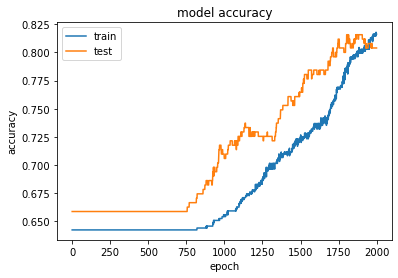

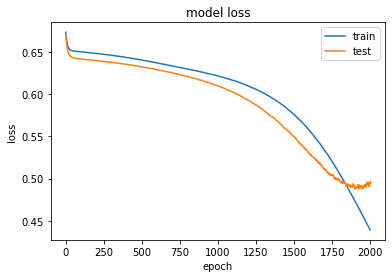

Maximum Loss : 0.6731

Minimum Loss : 0.4394

Loss difference : 0.2337
El modelo ha sido guardado


In [60]:
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt
from keras.models import Sequential
from keras.layers.core import Dense
from keras.layers import Dropout

# Hyperparameters
training_epochs = 2000 # Total number of training epochs
learning_rate = 0.01 # The learning rate

# create a model
def create_model():
    model = tf.keras.Sequential()
    # Hidden layer
    model.add(tf.keras.layers.Dense(8, input_dim=8,activation='softmax'))
   
    # Output layer
    model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

    # Compile a model
    model.compile(loss='binary_crossentropy', 
                  optimizer=tf.keras.optimizers.SGD(learning_rate),
                  metrics=['accuracy'])
    return model

model = create_model()
model.summary()

results = model.fit(
    x_tr, y_tr,
    epochs= training_epochs,
    validation_data = (x_ts, y_ts),
    verbose = 1
)



print("Evaluating on training set...")
(loss, accuracy) = model.evaluate(x_tr, y_tr, verbose=0)
print("loss={:.4f}, accuracy: {:.4f}%".format(loss,accuracy * 100))

print("Evaluating on testing set...")
(loss, accuracy) = model.evaluate(x_ts, y_ts, verbose=0)
print("loss={:.4f}, accuracy: {:.4f}%".format(loss,accuracy * 100))


# summarize history for accuracy
plt.plot(results.history['accuracy'])
plt.plot(results.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

# summarize history for loss
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()


max_loss = np.max(results.history['loss'])
min_loss = np.min(results.history['loss'])
print("Maximum Loss : {:.4f}".format(max_loss))
print("")
print("Minimum Loss : {:.4f}".format(min_loss))
print("")
print("Loss difference : {:.4f}".format((max_loss - min_loss)))

model_json = model.to_json()
with open("model.json","w") as json_file:
    json_file.write(model_json)
    
model.save("modelefc.h5")
print("El modelo ha sido guardado")

#### 5.	Análisis de resultados y presentacion

La mejor combinación resulto en una reducción de características originalmente se seleccionaron 11, pero se optimizo en 8 características representativas.

Los datos de entrenamiento se fijaron en un 75% de la muestra y los datos para prueba en 25%.

El número de iteraciones se fijó en 2000, con un factor de aprendizaje de 0.01.

Se realizaron distintas configuraciones, que van de uso de 1 a 2 capas ocultas, el uso de Dropout 0.5, el uso de la función Relu, el modelo de perdida Binary_crossentropy y SGD o adam. Pero ninguna combinación de factores arrojo buen resultado.

La configuración que dio el mejor resultado fue el uso de función Softmax sin capas, con el modelo de perdida Binary_crossentropy y SGD. Cuyos resultados se muestran.


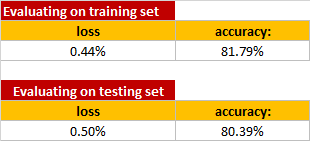
